In [9]:
import os
### QAOA_realestate가 있는 폴더로 지정
dir_path = "/Users/minhyeong-gyu/Documents/GitHub/QuantumVariableSelection"
os.chdir(dir_path)
import sys
module_path = dir_path + "/Module"
if module_path not in sys.path:
    sys.path.append(module_path)

from optimizer import optimizer as opt
from optimizer import basefunctions as bf

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import font_manager, rc
# 윈도우 한글 폰트
# font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font = font_manager.FontProperties(fname=font_path).get_name()
# rc('font', family=font)

# Mac 한글 폰트
rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
from dwave.system import LeapHybridCQMSampler
%matplotlib inline

In [20]:
result_table = pd.read_csv("result/simulation/result_table.csv").iloc[:,1:]

In [31]:
result_table.iloc[0,[0,1,2,3]]

                                                 R2 
              Original                  0.84(0.02)  
        SA_AIC                         0.84(0.02)   
        GA_AIC                          0.77(0.03)  
Name: 0, dtype: object

In [33]:
result_table.iloc[0,4:]

        SA_QUBO            0.7(0.06)  
        GA_QUBO              0.62(0.1)
Name: 0, dtype: object

In [72]:
plot_df = np.array([np.random.normal(float(result_table.iloc[0,1].strip()[:4]),float(result_table.iloc[0,1].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,2].strip()[:4]),float(result_table.iloc[0,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,3].strip()[:4]),float(result_table.iloc[0,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,4].strip()[:3]),float(result_table.iloc[0,4].strip()[4:8]),100),
np.random.normal(float(result_table.iloc[1,4].strip()[:4]),float(result_table.iloc[1,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,4].strip()[:4]),float(result_table.iloc[2,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,5].strip()[:3]),float(result_table.iloc[0,5].strip()[5:8]),100),
np.random.normal(float(result_table.iloc[1,5].strip()[:4]),float(result_table.iloc[1,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,5].strip()[:4]),float(result_table.iloc[2,5].strip()[5:9]),100)])
plot_df_label = np.array(["Original" for i in range(100)] +
["SA_AIC" for i in range(100)] +
["GA_AIC" for i in range(100)] +
["SA\nQUBO\n0.15" for i in range(100)] +
["SA\nQUBO\n0.10" for i in range(100)] + 
["SA\nQUBO\n0.05" for i in range(100)] + 
["GA\nQUBO\n0.15" for i in range(100)] + 
["GA\nQUBO\n0.10" for i in range(100)] +
["GA\nQUBO\n0.05" for i in range(100)])
plot_df = pd.DataFrame([plot_df_label,plot_df.reshape(-1)]).T
plot_df.columns = ["label","values"]

<AxesSubplot:xlabel='label', ylabel='values'>

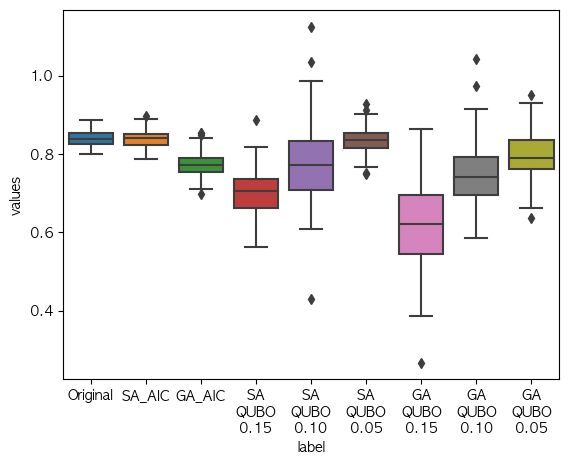

In [73]:
import seaborn as sns

sns.boxplot(x="label",y="values", data =plot_df)

In [125]:
plot_df_values = np.array([np.random.normal(float(result_table.iloc[0,2].strip()[:4]),float(result_table.iloc[0,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,3].strip()[:4]),float(result_table.iloc[0,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,4].strip()[:3]),float(result_table.iloc[0,4].strip()[4:8]),100),
np.random.normal(float(result_table.iloc[1,4].strip()[:4]),float(result_table.iloc[1,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,4].strip()[:4]),float(result_table.iloc[2,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0,5].strip()[:3]),float(result_table.iloc[0,5].strip()[5:8]),100),
np.random.normal(float(result_table.iloc[1,5].strip()[:4]),float(result_table.iloc[1,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2,5].strip()[:4]),float(result_table.iloc[2,5].strip()[5:9]),100)])
plot_df_label1 = np.array(["AIC" for i in range(200)] +
["QUBO\n0.15" for i in range(100)] +
["QUBO\n0.10" for i in range(100)] + 
["QUBO\n0.05" for i in range(100)] + 
["QUBO\n0.15" for i in range(100)] + 
["QUBO\n0.10" for i in range(100)] +
["QUBO\n0.05" for i in range(100)])
plot_df_label2 = np.array(["SA" for i in range(100)] +
["GA" for i in range(100)] +
["SA" for i in range(300)] +
["GA" for i in range(300)]
)


In [146]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","R Squared"]

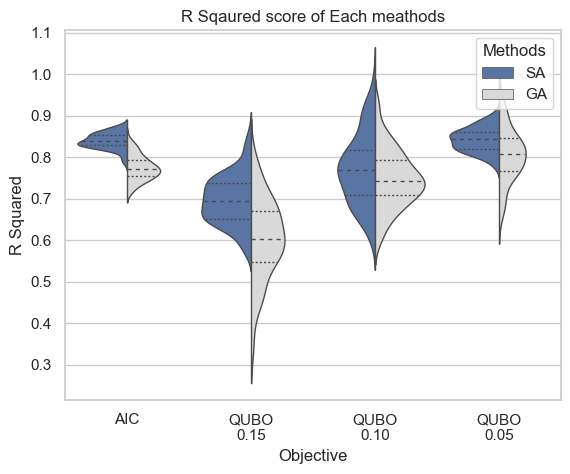

In [149]:
sns.violinplot(data=plot_df,x="Objective",y="R Squared",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("R Sqaured score of Each meathods")
plt.show()

In [153]:
i = 3
plot_df_values = np.array([
np.random.normal(float(result_table.iloc[0+i,2].strip()[:3]),float(result_table.iloc[0+i,2].strip()[4:8]),100),
np.random.normal(float(result_table.iloc[0+i,3].strip()[:3]),float(result_table.iloc[0+i,3].strip()[4:8]),100),
np.random.normal(float(result_table.iloc[0+i,4].strip()[:4]),float(result_table.iloc[0+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,4].strip()[:4]),float(result_table.iloc[1+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,4].strip()[:4]),float(result_table.iloc[2+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,5].strip()[:4]),float(result_table.iloc[0+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,5].strip()[:4]),float(result_table.iloc[1+i,5].strip()[5:8]),100),
np.random.normal(float(result_table.iloc[2+i,5].strip()[:4]),float(result_table.iloc[2+i,5].strip()[5:9]),100)])

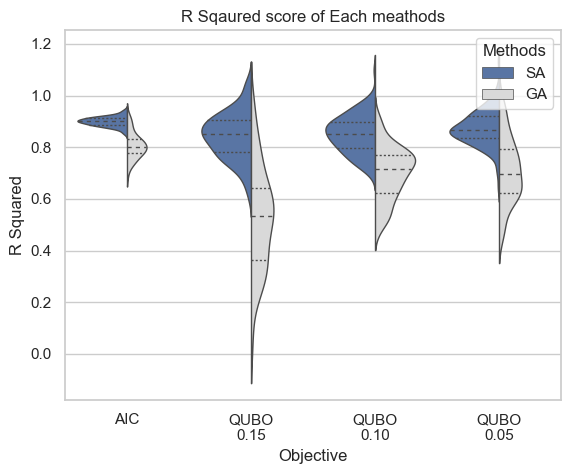

In [154]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","R Squared"]
sns.violinplot(data=plot_df,x="Objective",y="R Squared",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("R Sqaured score of Each meathods")
plt.show()

In [156]:
i = 6
plot_df_values = np.array([
np.random.normal(float(result_table.iloc[0+i,2].strip()[:4]),float(result_table.iloc[0+i,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,3].strip()[:4]),float(result_table.iloc[0+i,3].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,4].strip()[:4]),float(result_table.iloc[0+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,4].strip()[:4]),float(result_table.iloc[1+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,4].strip()[:4]),float(result_table.iloc[2+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,5].strip()[:4]),float(result_table.iloc[0+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,5].strip()[:4]),float(result_table.iloc[1+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,5].strip()[:4]),float(result_table.iloc[2+i,5].strip()[5:9]),100)])

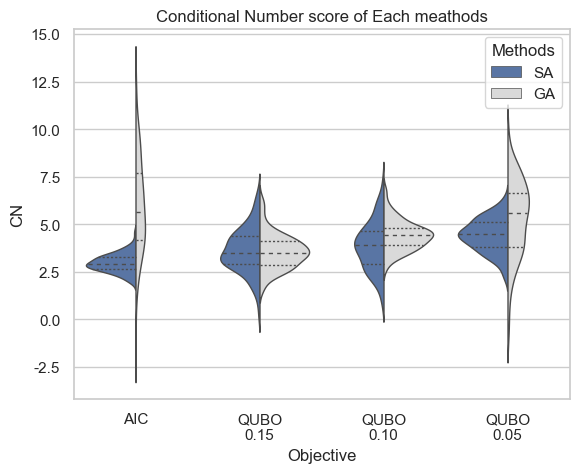

In [158]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","CN"]
sns.violinplot(data=plot_df,x="Objective",y="CN",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("Conditional Number score of Each meathods")
plt.show()

In [159]:
result_table

,,Original,SA_AIC,GA_AIC,SA_QUBO,GA_QUBO
0,R2,0.84(0.02),0.84(0.02),0.77(0.03),0.7(0.06),0.62(0.1)
1,R2,0.86(0.02),0.86(0.02),0.78(0.05),0.77(0.09),0.74(0.08)
2,R2,0.86(0.02),0.86(0.02),0.81(0.05),0.84(0.03),0.79(0.06)
3,R2,0.9(0.02),0.9(0.02),0.8(0.06),0.84(0.09),0.55(0.21)
4,R2,0.91(0.02),0.91(0.02),0.83(0.09),0.86(0.07),0.69(0.1)
5,R2,0.91(0.01),0.91(0.01),0.85(0.04),0.87(0.07),0.71(0.12)
6,CN,27.49(7.13),2.94(0.53),6.25(2.65),3.64(1.07),3.41(0.87)
7,CN,27.97(7.74),3.63(1.0),5.59(1.9),3.85(1.22),4.39(0.78)
8,CN,26.81(5.0),3.81(0.95),7.54(2.53),4.37(0.94),5.47(1.93)
9,CN,37.67(14.47),4.01(0.88),5.34(2.1),3.81(0.93),3.71(1.06)


In [160]:
i = 9
plot_df_values = np.array([
np.random.normal(float(result_table.iloc[0+i,2].strip()[:4]),float(result_table.iloc[0+i,2].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,3].strip()[:4]),float(result_table.iloc[0+i,3].strip()[5:8]),100),
np.random.normal(float(result_table.iloc[0+i,4].strip()[:4]),float(result_table.iloc[0+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,4].strip()[:4]),float(result_table.iloc[1+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,4].strip()[:4]),float(result_table.iloc[2+i,4].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[0+i,5].strip()[:4]),float(result_table.iloc[0+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[1+i,5].strip()[:4]),float(result_table.iloc[1+i,5].strip()[5:9]),100),
np.random.normal(float(result_table.iloc[2+i,5].strip()[:4]),float(result_table.iloc[2+i,5].strip()[5:9]),100)])

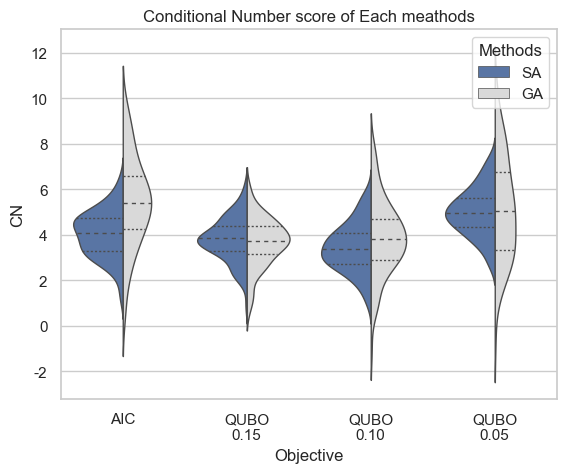

In [161]:
plot_df = pd.DataFrame(plot_df_label1).astype(str)
plot_df["Methods"] = pd.Series(plot_df_label2).astype(str)
plot_df["R Squared"] = pd.Series(plot_df_values.reshape(-1)).astype(float)
plot_df.columns = ["Objective","Methods","CN"]
sns.violinplot(data=plot_df,x="Objective",y="CN",hue="Methods",
               split=True, inner="quart", linewidth=1,
               palette={"SA": "b", "GA": ".85"})
plt.title("Conditional Number score of Each meathods")
plt.show()